In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import requests
from bs4 import BeautifulSoup
import nltk
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def getJobLinks(pageUrl):
    jobLinks    = []
    data     = requests.get(pageUrl).text
    soup     = BeautifulSoup(data)
    links = soup.findAll('a',attrs={'class':'base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]'})
    
    for link in links:
        jobLinks.append(link['href'])
    return jobLinks

In [3]:
getJobLinks("https://www.linkedin.com/jobs/search?keywords=Data%20Analyst&location=Cairo&geoId=101131993&trk=public_jobs_jobs-search-bar_search-submit&position=1&pageNum=0")

['https://eg.linkedin.com/jobs/view/data-analyst-at-axis-3276745296?refId=8q%2F7oifJCsn2L2CJYvWSpQ%3D%3D&trackingId=ecJ%2Fv83c1JSCjLBDt3Gqlg%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://eg.linkedin.com/jobs/view/data-analyst-at-moneyfellows-3124732696?refId=8q%2F7oifJCsn2L2CJYvWSpQ%3D%3D&trackingId=EUFF%2BLd6OHluWc0Lc4euJQ%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://eg.linkedin.com/jobs/view/data-bi-analyst-at-klivvr-3261615002?refId=8q%2F7oifJCsn2L2CJYvWSpQ%3D%3D&trackingId=58lOI5jiGQogsHnSDODGQA%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://eg.linkedin.com/jobs/view/data-analyst-at-olx-egypt-3179910275?refId=8q%2F7oifJCsn2L2CJYvWSpQ%3D%3D&trackingId=2TmUQ5b7sP8qf88lYalnAQ%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://eg.linkedin.com/jobs/view/data-visualization-associate-at-antal-international-3249531140?refId=8q%2F7oifJCsn2L2CJYvWSpQ%3D%3D&tracki

In [4]:
def getJobDetails(url):
    data           = requests.get(url).text
    soup           = BeautifulSoup(data)
    jobTitle      = soup.find('h1').text
    companyName       = ' '.join(soup.find("span",class_="topcard__flavor").text.split())
    jobLocation        = ' '.join(soup.find("span",class_="topcard__flavor topcard__flavor--bullet").text.split())
    jobInfo       = ' '.join(soup.find("div",class_="show-more-less-html__markup show-more-less-html__markup--clamp-after-5").text.split())
    releaseDate      = ' '.join(soup.find("span",class_="posted-time-ago__text topcard__flavor--metadata").text.split())
    
    infoLabel = soup.find("ul",class_="description__job-criteria-list").findAll('h3')
    infoValue = soup.find("ul",class_="description__job-criteria-list").findAll('span')
    infoCriteria = {}
    for i in range(len(infoLabel)):
        key = ' '.join(infoLabel[i].text.split())
        value = ' '.join(infoValue[i].text.split())
        infoCriteria[key] = value
    
    details = {"Job Title"     : jobTitle,
           "Company Name" : companyName,
            "Job Location"     : jobLocation,
            "Job Description"  : jobInfo,
            "Release Date"        : releaseDate}
        
    details.update(infoCriteria)
    
    return details

In [5]:
getJobDetails("https://eg.linkedin.com/jobs/view/data-analyst-at-axis-3276745296?refId=fcifQEy0gHGqIiXOpFu5Mw%3D%3D&trackingId=irYDcZmR6xocaWSiSfVCcw%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card")

{'Job Title': 'Data Analyst',
 'Company Name': 'Axis',
 'Job Location': 'القاهرة القاهرة مصر',
 'Job Description': "At Axis, our mission is to build a more accessible and equitable financial platform to empower the over 100 million Egyptians with a particular focus on the 70 million unbanked Egyptians. We're doing so by building digital products to help increase accessibility to payments, money transfers, savings, and digital access to credit.We are an early-stage startup founded by a team with previous experience in Fintech (mobile payments) in Egypt. Our founding team previously built Raseedy - Egypt's first independent open loop wallet licensed by the Central Bank of Egypt in partnership with SAIB bank.We are looking for innovative and motivated problem-solvers to join us on our journey. At Axis, you'll be surrounded by colleagues who are passionate about improving how financial services are delivered by build highly accessible financial products. If you're eager to help us build an

In [6]:
jobsToSearch = ["Data Analyst","Machine Learning","Software Testing"]
df = pd.DataFrame()
for job in jobsToSearch:
    # concatnating the job with the search link and updating the spaces by '%20'
    url = 'https://www.linkedin.com/jobs/search/?start=0&keywords=' + job.replace(' ','%20')
    # getting the job's links from the page
    links = getJobLinks(url)
    # iterating over each link and getting the details
    for link in links:
        try:
            new_df = pd.DataFrame(getJobDetails(link),index=[0])
            df = pd.concat([df,new_df],ignore_index=True)
        except:
            print(link+"\n")

https://www.linkedin.com/jobs/view/data-scientist-at-storm5-3283366988?refId=fCB6miRGVFYSRJDLylA6nQ%3D%3D&trackingId=CzIpUQls7dIaGnbeBa7FIg%3D%3D&position=9&pageNum=0&trk=public_jobs_jserp-result_search-card

https://www.linkedin.com/jobs/view/machine-learning-engineer-at-yakoa-3302362061?refId=fCB6miRGVFYSRJDLylA6nQ%3D%3D&trackingId=CgCB4s2EHiocGFsz7ieVRA%3D%3D&position=18&pageNum=0&trk=public_jobs_jserp-result_search-card

https://www.linkedin.com/jobs/view/ai-machine-learning-engineer-at-lockheed-martin-3302437181?refId=fCB6miRGVFYSRJDLylA6nQ%3D%3D&trackingId=lN17GPHzyKFSW%2FidnkvLzA%3D%3D&position=20&pageNum=0&trk=public_jobs_jserp-result_search-card

https://www.linkedin.com/jobs/view/manual-qa-tester-at-appian-corporation-3300062354?refId=7o78tFboRJVNymrp3arjaA%3D%3D&trackingId=afap9SjzAL%2F5EjGJQFQznA%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card



In [7]:
df

,Job Title,Company Name,Job Location,Job Description,Release Date,Seniority level,Employment type,Job function,Industries
0,Data Analyst,Saks OFF 5TH,New York City Metropolitan Area,"Data Analyst, Marketing Analytics and Insights...",5 days ago,Mid-Senior level,Full-time,Information Technology,Retail
1,Data Analyst - Recent Graduate,PayPal,Buffalo-Niagara Falls Area,"At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
2,Data Analyst,Segpay,"Deerfield Beach, FL",Job SummaryThe Data Analyst is responsible for...,5 days ago,Entry level,Full-time,Information Technology,Software Development
3,Data Analyst,SimpleTire,United States,The Data Analyst - eCommerce reports directly ...,5 days ago,Associate,Full-time,Analyst,"Technology, Information and Internet, Manufact..."
4,Data Analyst - Recent Graduate,PayPal,"Chicago, IL","At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
...,...,...,...,...,...,...,...,...,...
65,Manual QA Tester,Gravity IT Resources,"Charlotte, NC",Job Title: Manual QA TesterLocation: Charlotte...,1 week ago,Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting
66,Software Quality Assurance Tester,Peak Performers Staffing Agency,"Austin, TX",Peak Performers is seeking a Software Quality ...,3 days ago,Entry level,Part-time,Quality Assurance,Staffing and Recruiting
67,Manual QA,TEK NINJAS,"Phoenix, AZ",Job Title: Manual QA Client: PetSmart A/B/C re...,1 week ago,Entry level,Full-time,Quality Assurance,IT Services and IT Consulting
68,Quality Analyst,Xpanxion,United States,Candidates must be able to work on a W2 basis ...,6 days ago,Associate,Full-time,Quality Assurance,IT Services and IT Consulting


In [8]:
def renameColumns(oldName,newName):
    df=df.rename(columns = {oldName:newName})

In [9]:
df

,Job Title,Company Name,Job Location,Job Description,Release Date,Seniority level,Employment type,Job function,Industries
0,Data Analyst,Saks OFF 5TH,New York City Metropolitan Area,"Data Analyst, Marketing Analytics and Insights...",5 days ago,Mid-Senior level,Full-time,Information Technology,Retail
1,Data Analyst - Recent Graduate,PayPal,Buffalo-Niagara Falls Area,"At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
2,Data Analyst,Segpay,"Deerfield Beach, FL",Job SummaryThe Data Analyst is responsible for...,5 days ago,Entry level,Full-time,Information Technology,Software Development
3,Data Analyst,SimpleTire,United States,The Data Analyst - eCommerce reports directly ...,5 days ago,Associate,Full-time,Analyst,"Technology, Information and Internet, Manufact..."
4,Data Analyst - Recent Graduate,PayPal,"Chicago, IL","At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
...,...,...,...,...,...,...,...,...,...
65,Manual QA Tester,Gravity IT Resources,"Charlotte, NC",Job Title: Manual QA TesterLocation: Charlotte...,1 week ago,Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting
66,Software Quality Assurance Tester,Peak Performers Staffing Agency,"Austin, TX",Peak Performers is seeking a Software Quality ...,3 days ago,Entry level,Part-time,Quality Assurance,Staffing and Recruiting
67,Manual QA,TEK NINJAS,"Phoenix, AZ",Job Title: Manual QA Client: PetSmart A/B/C re...,1 week ago,Entry level,Full-time,Quality Assurance,IT Services and IT Consulting
68,Quality Analyst,Xpanxion,United States,Candidates must be able to work on a W2 basis ...,6 days ago,Associate,Full-time,Quality Assurance,IT Services and IT Consulting


In [10]:
for i in range(0,len(df["Job Description"])):
    sentences = nltk.sent_tokenize(df["Job Description"][i])
    sentence="\n\n".join(sentences)

In [11]:
print(sentence)

Cerbo is a high growth healthcare SaaS company, doing our part in the medical market to support holistic lifestyles and personalized medicine.

Our software – Cerbo EHR – is a cloud-based electronic health records (EHR) and patient portal software system.

Healthcare offices across the country – and some around the world – use Cerbo for most everything they do in their day-to-day.

Cerbo originally started as a developer’s nights-and-weekends project.

And has grown into one of the leading EHR systems for functional or “root cause” medicine and membership- or cash-based clinics.

Because of our unique origins, we often approach things a bit differently.

That is, success for us is not just about the bottom line.

It’s more about providing a great product, operating with integrity, and supporting our clients and our team.

During the past 4 years our team has grown and thousands of practitioners use our product.

To this end, we’re looking for Software Engineers to join our growing team

In [12]:
def sortSentences(df_column):
    for i in range(0,len(df_column)):
        sentences = nltk.sent_tokenize(df_column[i])
        sentence="\n\n".join(sentences)
    print(sentence)
    return None

In [13]:
sortSentences(df["Job Description"])

Cerbo is a high growth healthcare SaaS company, doing our part in the medical market to support holistic lifestyles and personalized medicine.

Our software – Cerbo EHR – is a cloud-based electronic health records (EHR) and patient portal software system.

Healthcare offices across the country – and some around the world – use Cerbo for most everything they do in their day-to-day.

Cerbo originally started as a developer’s nights-and-weekends project.

And has grown into one of the leading EHR systems for functional or “root cause” medicine and membership- or cash-based clinics.

Because of our unique origins, we often approach things a bit differently.

That is, success for us is not just about the bottom line.

It’s more about providing a great product, operating with integrity, and supporting our clients and our team.

During the past 4 years our team has grown and thousands of practitioners use our product.

To this end, we’re looking for Software Engineers to join our growing team

In [14]:
df=df.rename(columns = {"Job function":"Department"})

In [15]:
df

,Job Title,Company Name,Job Location,Job Description,Release Date,Seniority level,Employment type,Department,Industries
0,Data Analyst,Saks OFF 5TH,New York City Metropolitan Area,"Data Analyst, Marketing Analytics and Insights...",5 days ago,Mid-Senior level,Full-time,Information Technology,Retail
1,Data Analyst - Recent Graduate,PayPal,Buffalo-Niagara Falls Area,"At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
2,Data Analyst,Segpay,"Deerfield Beach, FL",Job SummaryThe Data Analyst is responsible for...,5 days ago,Entry level,Full-time,Information Technology,Software Development
3,Data Analyst,SimpleTire,United States,The Data Analyst - eCommerce reports directly ...,5 days ago,Associate,Full-time,Analyst,"Technology, Information and Internet, Manufact..."
4,Data Analyst - Recent Graduate,PayPal,"Chicago, IL","At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
...,...,...,...,...,...,...,...,...,...
65,Manual QA Tester,Gravity IT Resources,"Charlotte, NC",Job Title: Manual QA TesterLocation: Charlotte...,1 week ago,Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting
66,Software Quality Assurance Tester,Peak Performers Staffing Agency,"Austin, TX",Peak Performers is seeking a Software Quality ...,3 days ago,Entry level,Part-time,Quality Assurance,Staffing and Recruiting
67,Manual QA,TEK NINJAS,"Phoenix, AZ",Job Title: Manual QA Client: PetSmart A/B/C re...,1 week ago,Entry level,Full-time,Quality Assurance,IT Services and IT Consulting
68,Quality Analyst,Xpanxion,United States,Candidates must be able to work on a W2 basis ...,6 days ago,Associate,Full-time,Quality Assurance,IT Services and IT Consulting


<AxesSubplot:xlabel='Department', ylabel='count'>

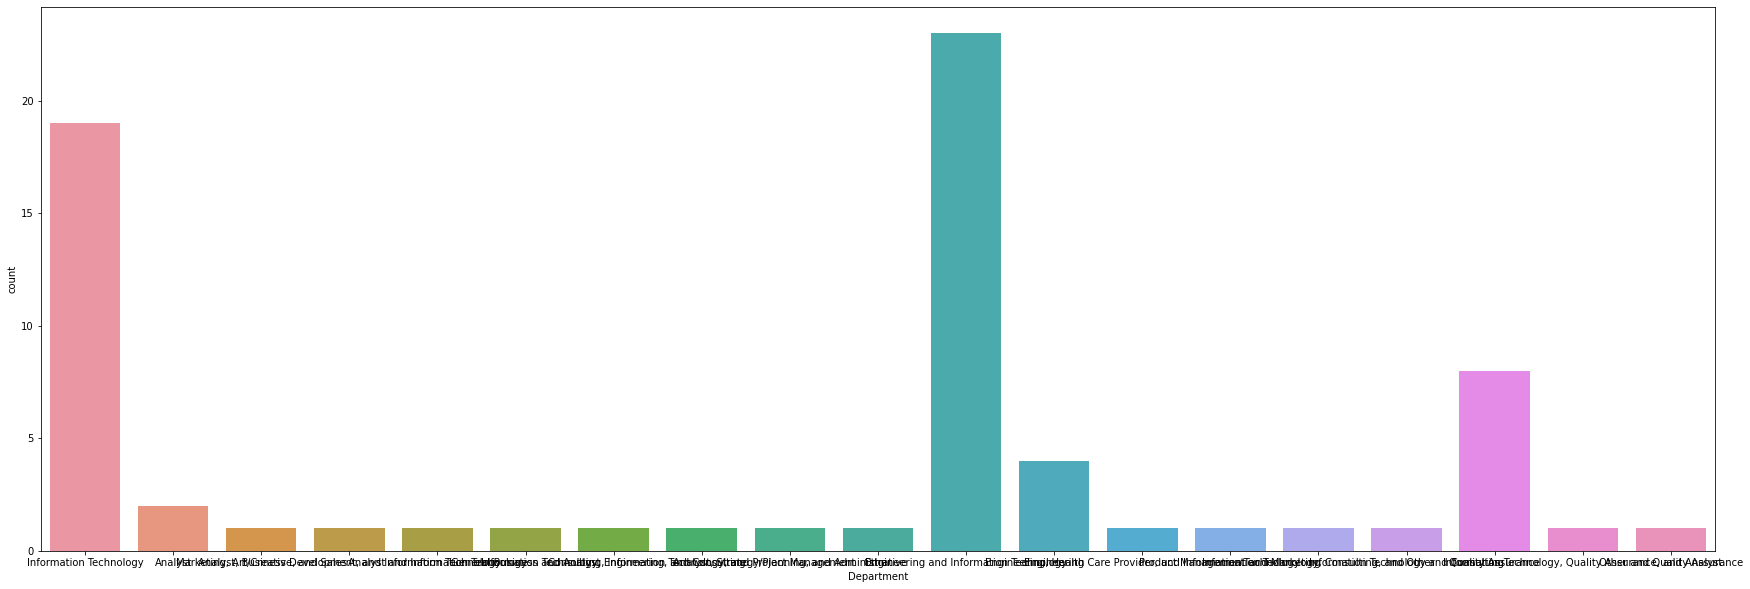

In [16]:
plt.figure(figsize=(30,10))
sns.countplot(x='Department',data=df)

In [32]:
class Linkedin:

    def getJobLinks(self,pageUrl):
        jobLinks    = []
        data     = requests.get(pageUrl).text
        soup     = BeautifulSoup(data)
        links = soup.findAll('a',attrs={'class':'base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]'})

        for link in links:
            jobLinks.append(link['href'])
        return jobLinks

    def getJobDetails(self,url):
        data           = requests.get(url).text
        soup           = BeautifulSoup(data)
        jobTitle      = soup.find('h1').text
        companyName       = ' '.join(soup.find("span",class_="topcard__flavor").text.split())
        jobLocation        = ' '.join(soup.find("span",class_="topcard__flavor topcard__flavor--bullet").text.split())
        jobInfo       = ' '.join(soup.find("div",class_="show-more-less-html__markup show-more-less-html__markup--clamp-after-5").text.split())
        releaseDate      = ' '.join(soup.find("span",class_="posted-time-ago__text topcard__flavor--metadata").text.split())

        infoLabel = soup.find("ul",class_="description__job-criteria-list").findAll('h3')
        infoValue = soup.find("ul",class_="description__job-criteria-list").findAll('span')
        infoCriteria = {}
        for i in range(len(infoLabel)):
            key = ' '.join(infoLabel[i].text.split())
            value = ' '.join(infoValue[i].text.split())
            infoCriteria[key] = value

        details = {"Job Title"     : jobTitle,
               "Company Name" : companyName,
                "Job Location"     : jobLocation,
                "Job Description"  : jobInfo,
                "Release Date"        : releaseDate}
        details.update(infoCriteria)
        return details
    
    def jobsToSearch(self):
        jobs = []
        numberOfJobs = int(input("Enter the Number of jobs you want to search for :"))
        i = 1
        while (i<=numberOfJobs):
            jobName = input("Enter the "+str(i)+" job ")
            print()
            jobs.append(jobName)
            i+=1
        return jobs
    
    def renameColumns(self,oldName,newName):
        df=df.rename(columns = {oldName:newName})
        return None
    
    def getJobs(self):
        jobs = self.jobsToSearch()
        df = pd.DataFrame()
        for job in jobs:
            # concatnating the job with the search job link and inserting the whitespaces with %20 because it's the delimiter
            url = 'https://www.linkedin.com/jobs/search/?start=0&keywords=' + job.replace(' ','%20')
            # getting the job links from the job page
            links = getJobLinks(url)
            # iterating over the links and getting the details of each link
            for link in links:
                try:
                    new_df = pd.DataFrame(getJobDetails(link),index=[0])
                    df = pd.concat([df,new_df],ignore_index=True)
                except:
                    print(link)
        
        return df
    
    def sortSentences(self,df_column):
        for i in range(0,len(df_column)):
            sentences = nltk.sent_tokenize(df_column[i])
            sentence="\n\n".join(sentences)
        return sentence
    
    def saveToCsvFile(self,fileName,dataframe):
        dataframe.to_csv(fileName+".csv",index=False,encoding='utf-8')
        return "Done"
        
    def saveToXslxFile(self,fileName,dataframe):
        dataframe.to_excel(fileName+".xslx",index=False,encoding='utf-8')
        return "Done"


In [18]:
df.to_csv("Linkedin Jobs in Egypt Final.csv",index=False,encoding='utf-8')

In [19]:
df = pd.read_csv('Linkedin Jobs in Egypt Final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        70 non-null     object
 1   Company Name     70 non-null     object
 2   Job Location     70 non-null     object
 3   Job Description  70 non-null     object
 4   Release Date     70 non-null     object
 5   Seniority level  70 non-null     object
 6   Employment type  70 non-null     object
 7   Department       70 non-null     object
 8   Industries       70 non-null     object
dtypes: object(9)
memory usage: 5.0+ KB


In [20]:
df.head()

,Job Title,Company Name,Job Location,Job Description,Release Date,Seniority level,Employment type,Department,Industries
0,Data Analyst,Saks OFF 5TH,New York City Metropolitan Area,"Data Analyst, Marketing Analytics and Insights...",5 days ago,Mid-Senior level,Full-time,Information Technology,Retail
1,Data Analyst - Recent Graduate,PayPal,Buffalo-Niagara Falls Area,"At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."
2,Data Analyst,Segpay,"Deerfield Beach, FL",Job SummaryThe Data Analyst is responsible for...,5 days ago,Entry level,Full-time,Information Technology,Software Development
3,Data Analyst,SimpleTire,United States,The Data Analyst - eCommerce reports directly ...,5 days ago,Associate,Full-time,Analyst,"Technology, Information and Internet, Manufact..."
4,Data Analyst - Recent Graduate,PayPal,"Chicago, IL","At PayPal (NASDAQ: PYPL), we believe that ever...",1 week ago,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ..."


In [21]:
data = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        locations = df['Job Location'],
        locationmode = "country names",
        z = df['Job Title'],
        text = df['Job Location'],
        colorbar = {'title' : 'Job Location'},
      )

In [22]:
layout = dict(title = 'Job Number',
              geo = dict(projection = {'type':'mercator'})
             )

In [23]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

<AxesSubplot:xlabel='Seniority level', ylabel='count'>

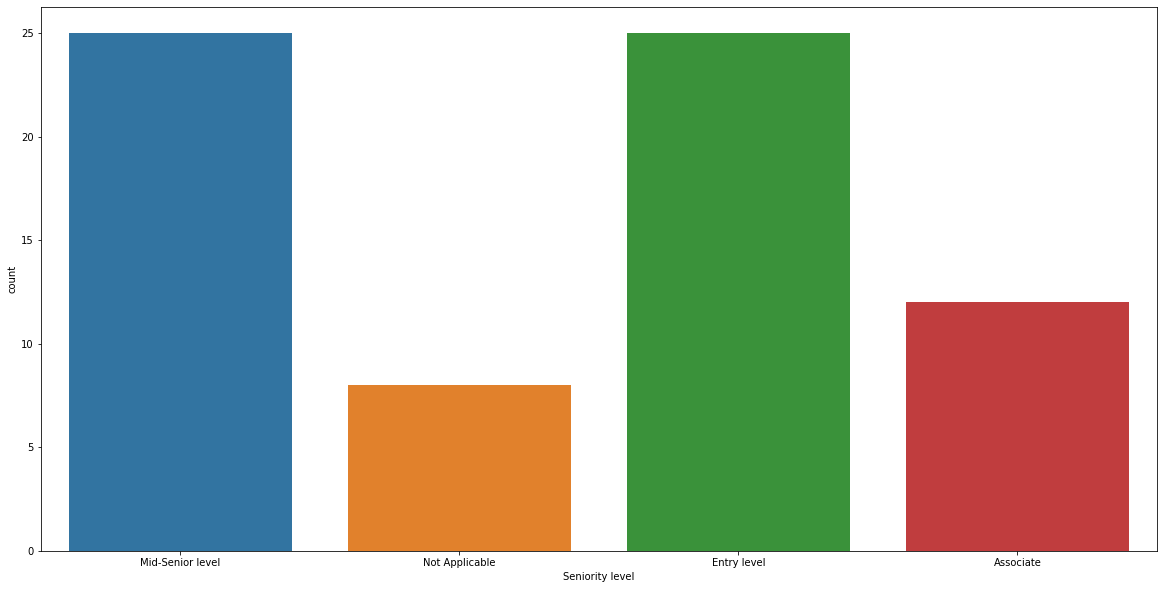

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='Seniority level',data=df)

In [25]:
df["Job Location"].value_counts()

United States                      8
Chicago, IL                        4
Austin, TX                         4
New Jersey, United States          2
Atlanta, GA                        2
New York, United States            2
Mountain View, CA                  2
Dallas, TX                         2
California, United States          2
Denver, CO                         2
Charlotte, NC                      2
Hoboken, NJ                        2
Dubuque, IA                        1
Iselin, NJ                         1
Oxon Hill, MD                      1
Moorestown, NJ                     1
Indianapolis, IN                   1
Pleasanton, CA                     1
New York City Metropolitan Area    1
Greater Philadelphia               1
Long Beach, CA                     1
Pittsburgh, PA                     1
San Diego, CA                      1
Alpharetta, GA                     1
Manhattan, NY                      1
King of Prussia, PA                1
Phoenix, AZ                        1
S

<AxesSubplot:xlabel='Job Location', ylabel='count'>

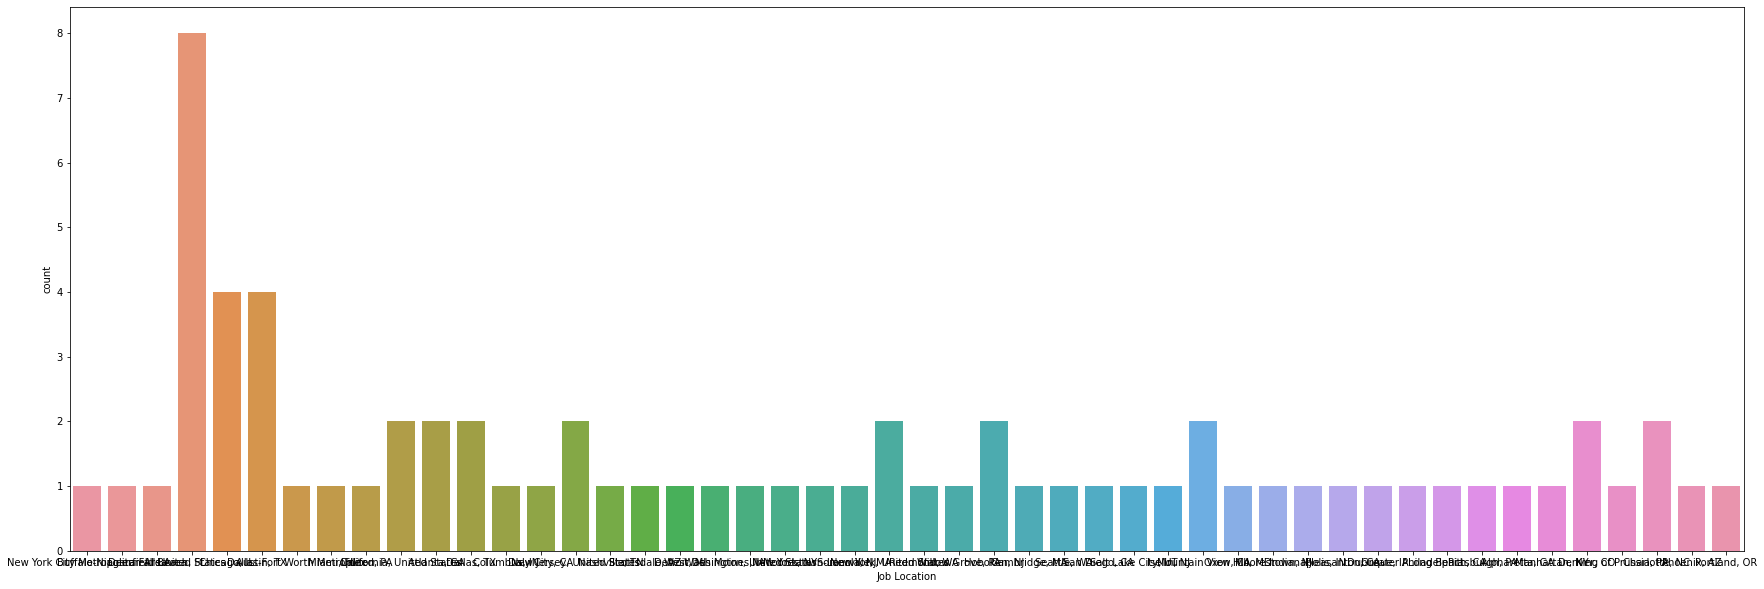

In [26]:
plt.figure(figsize=(30,10))
sns.countplot(x='Job Location',data=df)

<AxesSubplot:xlabel='Employment type', ylabel='Count'>

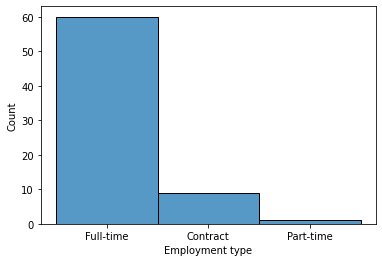

In [27]:
sns.histplot(data=df,x=df["Employment type"],palette="darkgrid")

<AxesSubplot:xlabel='Company Name', ylabel='count'>

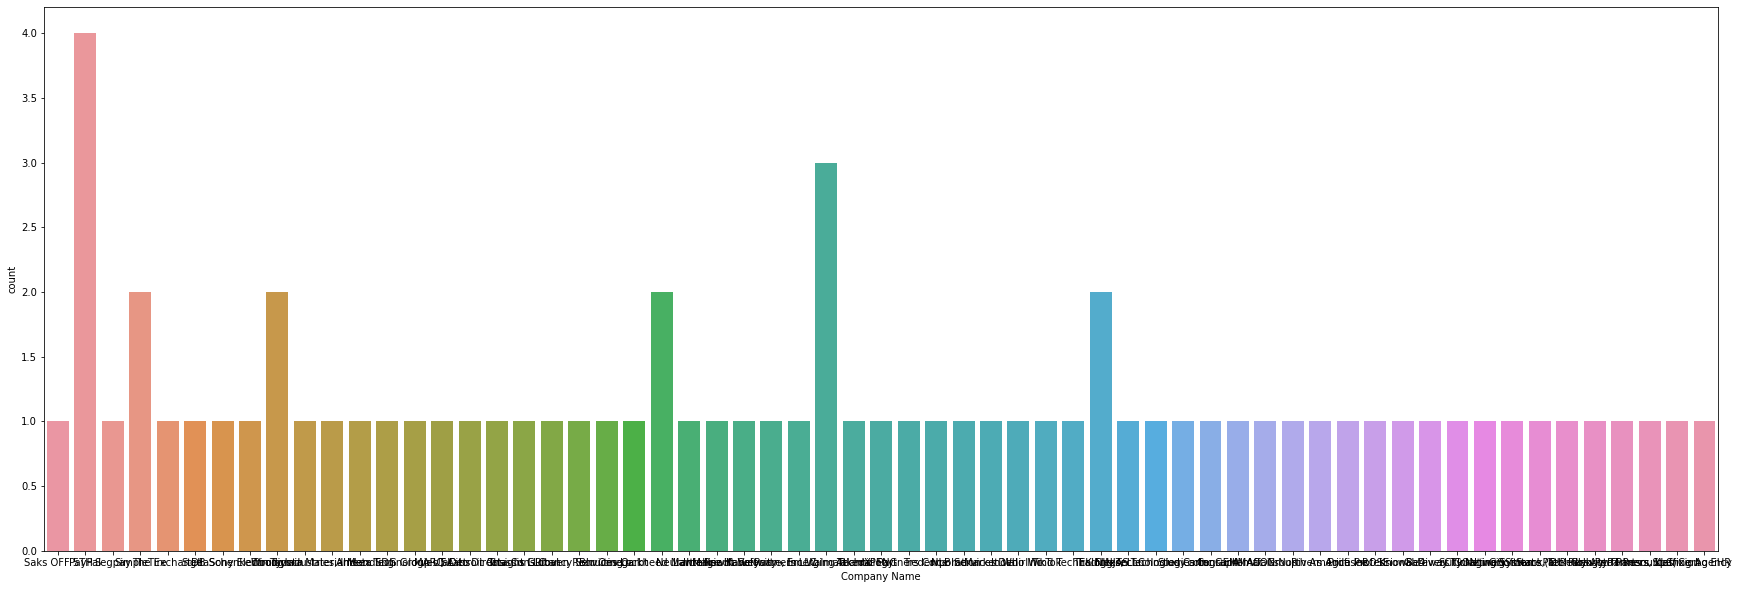

In [28]:
plt.figure(figsize=(30,10))
sns.countplot(x='Company Name',data=df)

In [33]:
linkedin = Linkedin()

In [34]:
jobsDf = linkedin.getJobs()

Enter the Number of jobs you want to search for :5
Enter the 1 job Research Analyst

Enter the 2 job Mechanical Engineer

Enter the 3 job Software Developer

Enter the 4 job Data Analyst

Enter the 5 job Doctor

https://www.linkedin.com/jobs/view/mechanical-design-engineer-at-hydra-electric-company-3283640717?refId=xgsIzrqKka1mpshKW1Uxkg%3D%3D&trackingId=gRujWA4EEQ%2Fb8qtoO4Np3Q%3D%3D&position=17&pageNum=0&trk=public_jobs_jserp-result_search-card
https://www.linkedin.com/jobs/view/software-engineer-early-career-at-lockheed-martin-3302437358?refId=jlAKVkQnbcITLwa5N00Szg%3D%3D&trackingId=Lx9A1T%2FQfRiMceFb4WhM5A%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card
https://www.linkedin.com/jobs/view/internship-software-engineering-at-snackpass-3303557571?refId=jlAKVkQnbcITLwa5N00Szg%3D%3D&trackingId=lJ%2B6yfesQo42ho7y4wfgvg%3D%3D&position=8&pageNum=0&trk=public_jobs_jserp-result_search-card
https://www.linkedin.com/jobs/view/junior-software-engineer-at-act-on-software-inc-3

In [35]:
jobsDf

,Job Title,Company Name,Job Location,Job Description,Release Date,Seniority level,Employment type,Job function,Industries
0,Research Analyst,Korn Ferry,"New York, NY",KEY RESPONSIBILITIES: The Research Associate i...,1 week ago,Entry level,Full-time,"Research, Analyst, and Strategy/Planning",Business Consulting and Services
1,Research Analyst,Echelon Insights,"Alexandria, VA",Echelon Insights is hiring a Research Analyst ...,4 weeks ago,Entry level,Full-time,"Research, Analyst, and Information Technology",Market Research
2,Research Analyst,"Blue Rose Consulting Group, Inc.","Washington, DC",Blue Rose is seeking a Research Analyst to sup...,1 week ago,Mid-Senior level,Full-time,"Research, Analyst, and Information Technology",Business Consulting and Services
3,Research Analyst I,Harvard University,"Cambridge, MA",Job SummaryThe Research Analyst will be part o...,1 month ago,Associate,Full-time,Research,Higher Education
4,Research Analyst - US Consumer Discretionary,Lazard Asset Management,"New York, NY",Lazard Asset Management operates in 41 cities ...,1 week ago,Mid-Senior level,Full-time,"Analyst, Finance, and Research",Investment Management
...,...,...,...,...,...,...,...,...,...
92,Nurse Navigator,American Lung Association,"Illinois, United States","Statewide, ILJob Number: IL #2223-044Type: Ful...",2 days ago,Associate,Full-time,Health Care Provider,Non-profit Organizations
93,"Director, Doctor of Healthcare Administration ...",Lake Erie College of Osteopathic Medicine,"Bradenton, FL",OverviewDate Posted:10/3/2022Location:Bradento...,3 weeks ago,Associate,Part-time,Health Care Provider,Higher Education
94,PS Nurse Practitioner,University of Utah,"Salt Lake City, UT",DetailsOpen Date 10/03/2022Requisition Number ...,1 day ago,Associate,Full-time,Health Care Provider,Higher Education
95,Nurse Appeals,Elevance Health,United States,Job Family: Medical and ClinicalType: Full tim...,1 week ago,Associate,Full-time,Health Care Provider,Hospitals and Health Care


In [36]:
jobsDf["Job Description"][0]

'KEY RESPONSIBILITIES: The Research Associate is an important part of his/her respective Sector and/or Center of Excellence. The primary focus of this role is supporting the practice in preparing for business development meetings and delivering on executive search projects. Typical job focus includes: • Preparing company overviews for account teams • Researching companies and developing target lists • Identifying potential candidates from a variety of online and proprietary tools • Calling companies to determine organization structure A successful Research Associate career path typically includes opportunities for promotion to Associate and/or Senior Associate, which has extensive client contact and business development expectations. Career paths for successful candidates may also include a more senior Research position (e.g. “Knowledge Manager”) for a sector or COE cluster. Additional responsibilities for a Research Associate may include: Searcher™ Data Quality Management and Entry Co

In [37]:
linkedin.sortSentences(jobsDf["Job Description"])

"Job Family: Medical and ClinicalType: Full timeDate Posted:Sep 13, 2022Req #: JR22111Location:National +50 Miles away from nearest PulsePoint, National +50 Miles away from nearest PulsePointDescriptionJob Description: ExternalLocation: RemoteSchedule: 7:30-5:30pm EST or Central time zonePrimary Duties May Include, But Are Not Limited ToThe Nurse Appeals is responsible for investigating and processing quality of care issues, clinical grievances, and critical incidents from members, providers, and internal staff.Conducts investigations and reviews of member grievances and potential quality of care issuesReviews medical records for potential quality of care issuesExtrapolates and summarizes medical information for medical director.Ensures that Quality of care reviews and clinical grievances are resolved timely to meet regulatory timeframes.Documents and logs grievance information and quality of care investigations on relevant tracking systems and mainframe systems.Generates written corre

### GUI

In [ ]:
#from tkinter import *

In [ ]:
#top = Tk()
#top.title("Linkedin Webscraping")tware
#top.minsize(300,300)

In [ ]:
#label1 = Label(text="Enter the number of jobs to search for")
#label1.pack()
#label1Entry = Entry()
#label1Entry.pack()

#label2 = Label(text="Enter the jobs name to search for")
#label2.pack()
#label2Entry = Entry()
#label2Entry.pack()

#def buttonFunction():
#    label1Entry.get()
#    label2Entry.get()
    
#    linkedin = Linkedin()
#    linkedin.getJobs()
#    resultLabel = Label(text="Done")
#    resultLabel.pack()

#but = Button(text="Result",command=buttonFunction)
#but.pack()

#top.mainloop()